In [62]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

Path

In [63]:
RAW_PATH = config['paths']['raw_data']
INTERIM_PATH = config['paths']['interim_data']
PROCESSED_PATH = config['paths']['processed_data']

Case data calls

In [64]:
df_raw = pd.read_csv(f'{RAW_PATH}\smileannotationsfinal.csv', delimiter=',', names=['id', 'text', 'category'])
print(df_raw.info())

.head()

SyntaxError: invalid syntax (3211032675.py, line 4)

In [65]:
# check for nulls
df_raw.isnull().sum()

id          0
text        0
category    0
dtype: int64

In [66]:
# check dtypes
df_raw.dtypes

id           int64
text        object
category    object
dtype: object

In [67]:
# unique records count based on id
df_raw.id.nunique()

3085

In [68]:
# check dist of category
df_raw_category_dist = df_raw.category.value_counts(dropna=False, normalize=True)
df_raw_category_dist

category
nocode               0.509562
happy                0.368558
not-relevant         0.069368
angry                0.018476
surprise             0.011345
sad                  0.010373
happy|surprise       0.003566
happy|sad            0.002917
disgust|angry        0.002269
disgust              0.001945
sad|disgust          0.000648
sad|angry            0.000648
sad|disgust|angry    0.000324
Name: proportion, dtype: float64

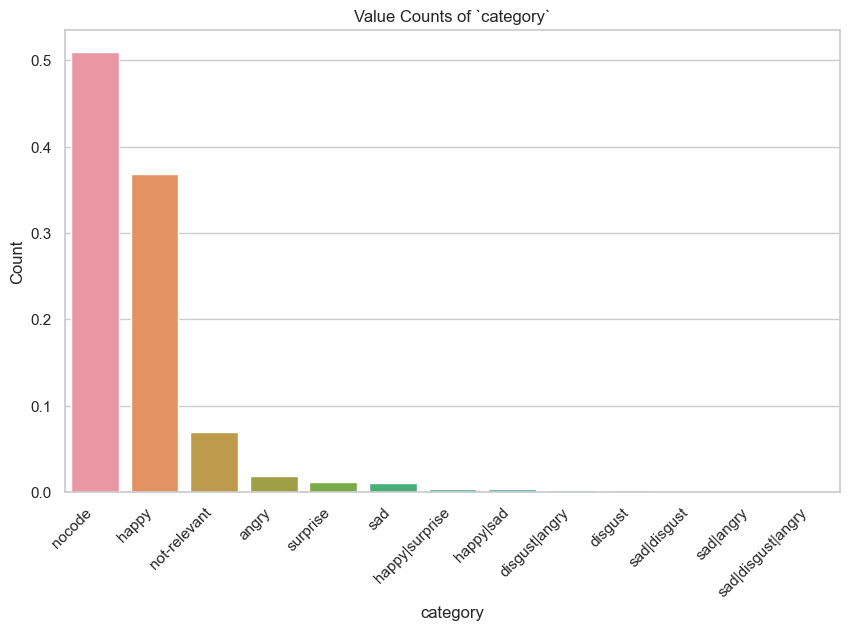

In [69]:
# plot category dist
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=df_raw_category_dist.index, y=df_raw_category_dist.values)
plt.xlabel('category')
plt.ylabel('Count')
plt.title(f'Value Counts of `category`')
plt.xticks(rotation=45, ha='right')
plt.show()

Target variable 'category' seems very imbalance. Lets dive in to explore more on the texts for each category.

In [70]:
all_category_list = df_raw.category.unique().tolist()
all_category_list

['nocode',
 'happy',
 'not-relevant',
 'angry',
 'disgust|angry',
 'disgust',
 'happy|surprise',
 'sad',
 'surprise',
 'happy|sad',
 'sad|disgust',
 'sad|angry',
 'sad|disgust|angry']

In [79]:
# loop and display sample text for each category
for i in all_category_list:
    subset_df = df_raw[df_raw['category'] == i]
    print(f'Category: {i}')
    print(f'Sample text:')
    if len(subset_df) >= 5:
        print(subset_df.text.sample(5).values.tolist())
        print('\n')
    else:
        print(subset_df.text.values.tolist())
        print('\n')

Category: nocode
Sample text:
['#bennicholson @kettlesyard http://t.co/niI8OQYb3e http://t.co/RBMeP7d3tM', 'Una app con actividades en torno a la colección de la @NationalGallery para niños a partir de 9 años. http://t.co/ltzvrlx26m #appartkids', 'Sutton Hoo Ship burial @britishmuseum http://t.co/wkNOyVWg5Z', 'THE TWEETETTES TIMES is out! http://t.co/hxrjtCGx9J Stories via @britishmuseum', "Link http://t.co/NWRpsyIgwK por @britishmuseum es el tuit más popular en mis 'news feed' de hoy"]


Category: happy
Sample text:
["Looking forward to #soundscapes @NationalGallery - 'hear' the paintings, 'see' the sounds: how intriguingly enticing! http://t.co/vHceZlWXcm", 'Great @penn_state pic! #SHCTravel @britishmuseum  https://t.co/WCtjm3PPbG', '@britishmuseum my fav', "A wonderful exhibition of Enid Blyton's work is on at @plymouthmuseum until Aug 29th @plymouthherald http://t.co/XUH307PTU4 #DevonDays", 'Year 5 are now busy in the Digital Discovery Centre @britishmuseum  - they are having a gre

Next steps (EDA):
1. Text length analysis
2. Word cloud (keyword analysis)
3. Correlation analysis between category & keywords
4. Language distribution check (currently it seems to only be Eng)
5. Outlier detection (text length)
6. Resampling minority classes
7. Class specific analysis
8. Stratified sampling... to make sure each class is represented proportionally